In [5]:
#https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/


import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np

class Polygon:
    def __init__(self, cnts, approx, rect):
        self.contours = cnts
        self.polyline = approx
        self.rectangle = rect
    def __repr__(self):
        x,y,w,h = self.rectangle
        return "P{} ({},{},{},{})".format(len(self.polyline),x,y,w,h)


def create_binary(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    threshi = cv2.bitwise_not(thresh)
    return threshi

def detect_polygones(image):
    polygones = []
   
    
    # find contours in the thresholded image and initialize the
    # shape detector
    cnts = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)


    size = image.shape[0] * image.shape[1]
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)

        # compute the bounding box of the contour and use the
        # bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        s = w * h / size
        #filter smaller rectangles, <25 percent
        if s < 0.10: continue
        polygones.append(Polygon(cnts,approx,(x, y, w, h)))
    
    return polygones


                         
def paint_polygones(image,polygones):
    for polygon in polygones:
        cv2.drawContours(image, polygon.contours, -1, color=(255, 255, 0), thickness=3) #thickness=cv2.FILLED
        #cv2.polylines(image, [polygon.polyline], True, (255,255,0), thickness=3) 
        x , y , w , h = polygon.rectangle
        cv2.rectangle(image, (x,y), (x + w,y + h), (0,255,255), thickness = 5)   
                         
def handle_image(image_path):
    # load the image and resize it to a smaller factor so that
    # the shapes can be approximated better
    image = cv2.imread(image_path)
    resized = imutils.resize(image, width=300)     
    
    plt.imshow(resized)
    plt.show()
    
    binary = create_binary(resized)
    
    plt.imshow(binary)
    plt.show()
    
    polygones = detect_polygones(binary)
    print(len(polygones)," polygones detected",polygones)
        
    width = resized.shape[0]
    height = resized.shape[1]
                         
    pimg = np.zeros((width, height, 3), dtype = "uint8")
      
    paint_polygones(pimg,polygones)
    
   
                         
    plt.imshow(pimg)
    plt.show()

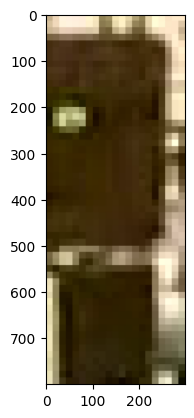

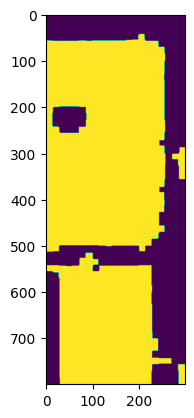

2  polygones detected [P4 (0,543,271,257), P4 (0,43,256,471)]


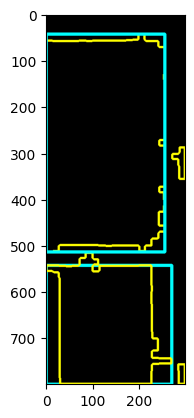

In [6]:
handle_image("../reports/20211006LMLS63460videomp4/images/115_original.png")

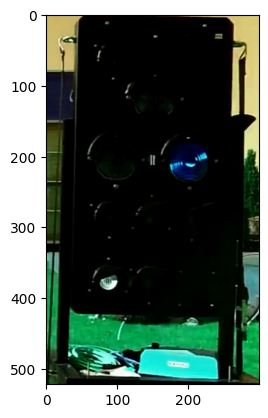

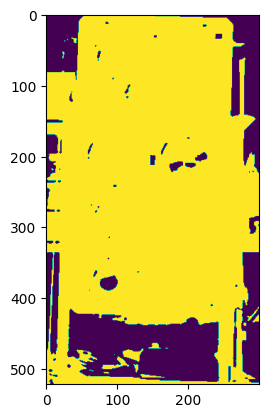

1  polygones detected [P4 (0,0,300,522)]


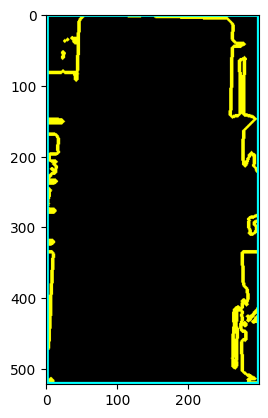

In [7]:
handle_image("../data/drohne-signals/traffic_light0011.png")

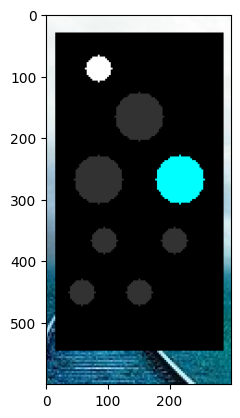

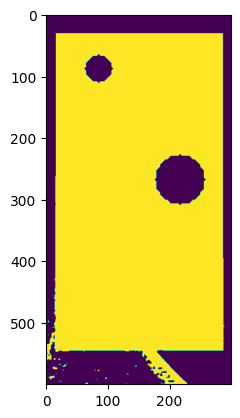

1  polygones detected [P4 (0,31,287,569)]


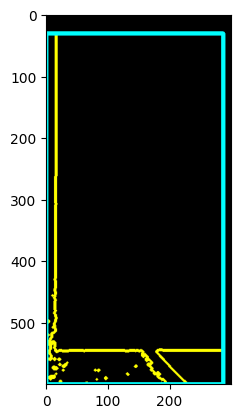

In [8]:
handle_image("../data/gen-signals/kshauptsignal2_Ks2_vBw.png")

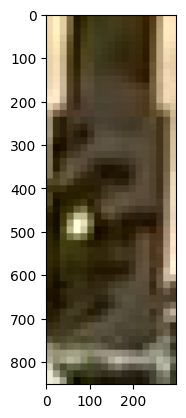

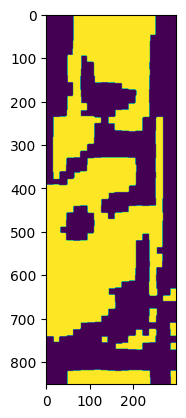

2  polygones detected [P8 (0,237,268,518), P6 (17,0,234,380)]


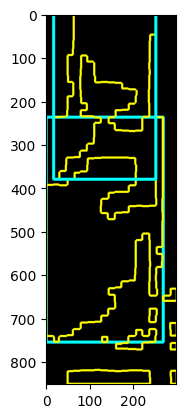

In [14]:
handle_image("../reports/20211006LMLS63460videomp4/images/256_original.png")

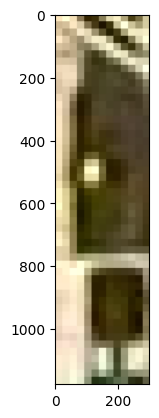

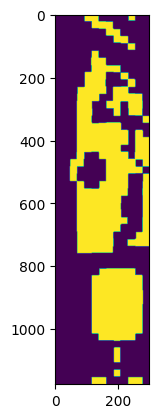

2  polygones detected [P4 (116,809,161,228), P6 (70,117,230,643)]


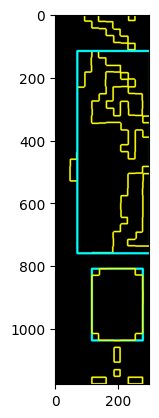

In [10]:
handle_image("../reports/20211006LMLS63460videomp4/images/44_original.png")

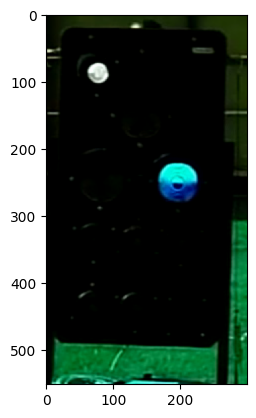

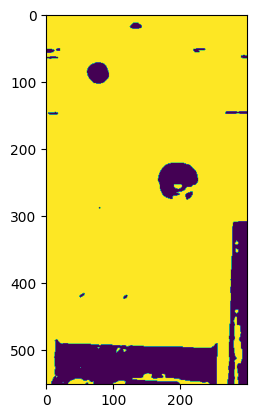

1  polygones detected [P4 (0,0,300,552)]


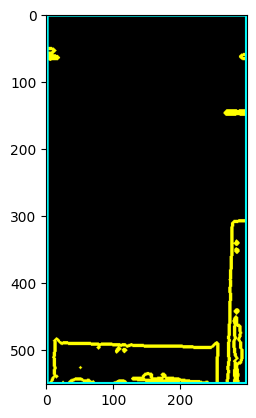

In [11]:
handle_image("../data/drohne-signals/traffic_light0032.png")

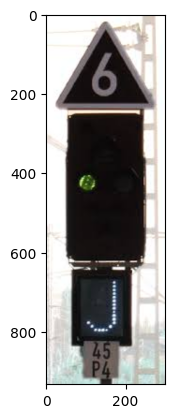

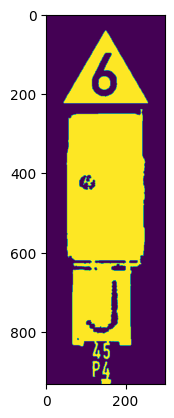

2  polygones detected [P3 (57,240,186,629), P3 (44,41,213,184)]


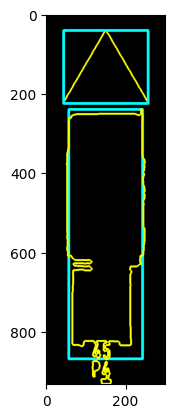

In [12]:
handle_image("../data/signal_mit_dreieck.jpg")


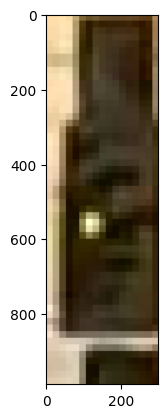

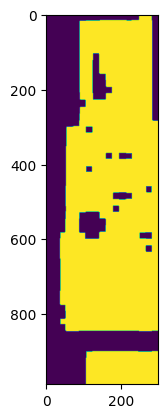

1  polygones detected [P4 (54,0,246,847)]


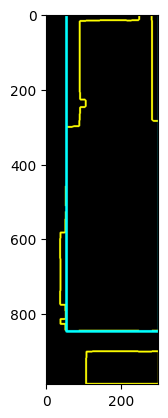

In [13]:
handle_image("../reports/20211006LMLS63460videomp4/images/10_original.png")